In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


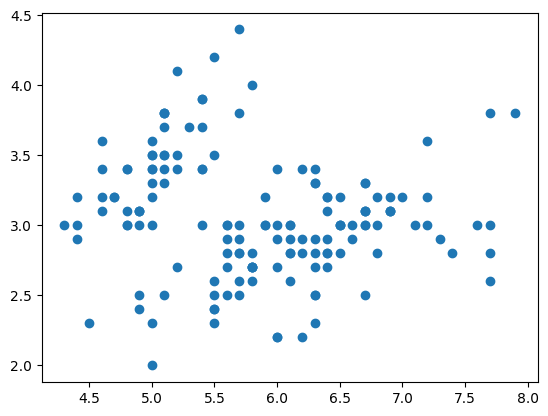

In [4]:
df=df[['sepal_length','sepal_width']]
plt.scatter(df['sepal_length'],df['sepal_width'])

In [6]:
X = df.values
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
nbrs.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=3)

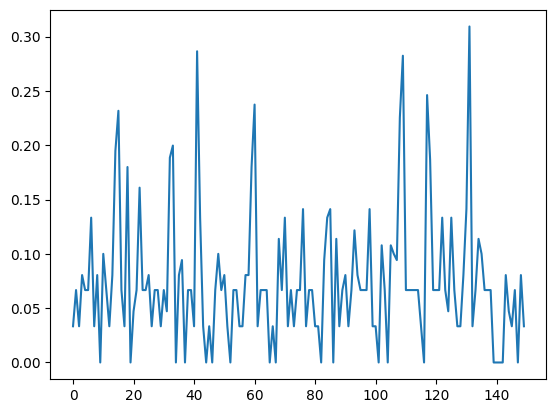

In [7]:
distances, indexes=nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1))

In [8]:
outlier_index = np.where(distances.mean(axis=1)>0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [9]:
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


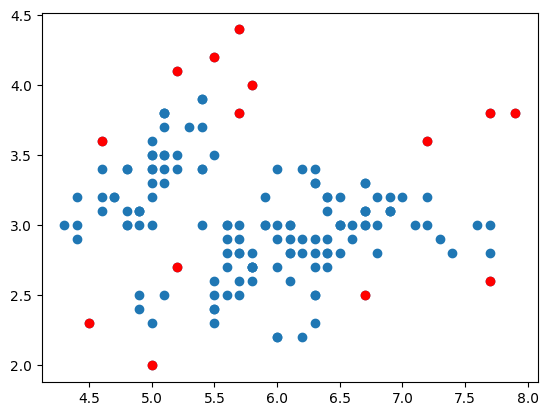

In [10]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.scatter(outlier_values['sepal_length'],outlier_values['sepal_width'],color='red')